This is an initial Exploratory analyses
Looks at music between 1950 and 2019

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('tcc_ceds_music.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

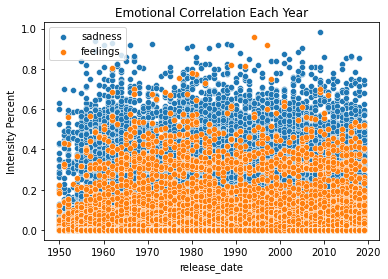

In [7]:
# Create Scatter Plot
ax = sns.scatterplot(x="release_date", y="sadness", data=df, label="sadness")
ax = sns.scatterplot(x="release_date", y="feelings", data=df, label="feelings")
plt.ylabel('Intensity Percent')
plt.title('Emotional Correlation Each Year')
plt.legend()
plt.show()

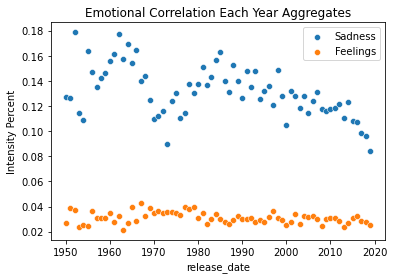

In [8]:
# Unwieldy Representation so need to find aggregates of the emotions
# Group by "release_date" and calculate the mean
grouped_df = df.groupby('release_date').mean().reset_index()

# Display the new dataframe
grouped_df.head()

# Create Scatter Plot
ax = sns.scatterplot(x="release_date", y="sadness", data=grouped_df, label='Sadness')
ax = sns.scatterplot(x="release_date", y="feelings", data=grouped_df, label='Feelings')
plt.ylabel('Intensity Percent')
plt.title('Emotional Correlation Each Year Aggregates')
plt.legend()
plt.show()

In [9]:
# Attempted Initial SciKitLearn Decision Tree
from sklearn.model_selection import train_test_split

In [14]:
# Would Do preprocessing of data but already in clean form

# Features and target variable
X = df[['sadness','energy']]
y = df['release_date']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 1.87%


In [22]:
# Wow... that is horrible... 
# Therefore need to first determine which variables are actually predictive of year_released...
# Using Random Forest Generator FIRST to see what I can ascertain

# Determining One-Hot Encoding Features
print(df['genre'].unique())
print(df['genre'].value_counts())

print(df['topic'].unique())
print(df['topic'].value_counts())

['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: genre, dtype: int64
['sadness' 'world/life' 'music' 'romantic' 'violence' 'obscene'
 'night/time' 'feelings']
sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: topic, dtype: int64


In [23]:
# Applying One Hot Encoding to variables
one_hot_encoded_df = pd.get_dummies(df, columns=['genre','topic'])
one_hot_encoded_df.head()

,Unnamed: 0,artist_name,track_name,release_date,lyrics,len,dating,violence,world/life,night/time,...,genre_reggae,genre_rock,topic_feelings,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0,mukesh,mohabbat bhi jhoothi,1950,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0,0,0,0,0,0,0,1,0,0
1,4,frankie laine,i believe,1950,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0,0,0,0,0,0,0,0,0,1
2,6,johnnie ray,cry,1950,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0,0,0,1,0,0,0,0,0,0
3,10,pérez prado,patricia,1950,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0,0,0,0,0,0,1,0,0,0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0,0,0,0,0,0,1,0,0,0


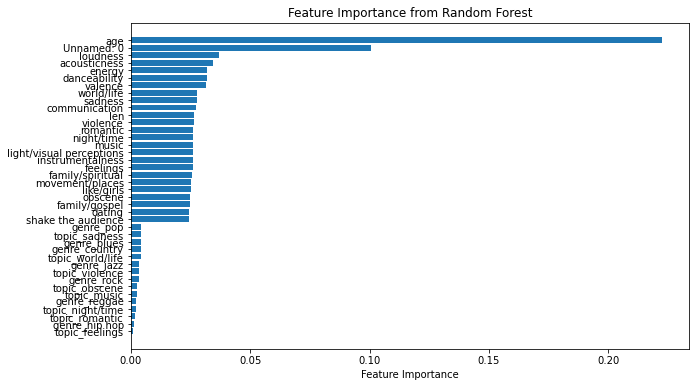

In [24]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Preprocess your data
X = one_hot_encoded_df.drop(columns=['release_date','artist_name','track_name','lyrics'])  # Features
y = one_hot_encoded_df['release_date']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [25]:
print(df['age'].unique())
print(df['age'].value_counts())

[1.         0.98571429 0.97142857 0.95714286 0.94285714 0.92857143
 0.91428571 0.9        0.88571429 0.87142857 0.85714286 0.84285714
 0.82857143 0.81428571 0.8        0.78571429 0.77142857 0.75714286
 0.74285714 0.72857143 0.71428571 0.7        0.68571429 0.67142857
 0.65714286 0.64285714 0.62857143 0.61428571 0.6        0.58571429
 0.57142857 0.55714286 0.54285714 0.52857143 0.51428571 0.5
 0.48571429 0.47142857 0.45714286 0.44285714 0.42857143 0.41428571
 0.4        0.38571429 0.37142857 0.35714286 0.34285714 0.32857143
 0.31428571 0.3        0.28571429 0.27142857 0.25714286 0.24285714
 0.22857143 0.21428571 0.2        0.18571429 0.17142857 0.15714286
 0.14285714 0.12857143 0.11428571 0.1        0.08571429 0.07142857
 0.05714286 0.04285714 0.02857143 0.01428571]
0.042857    660
0.028571    653
0.071429    617
0.157143    597
0.114286    588
           ... 
0.928571    106
0.971429     60
0.985714     58
1.000000     51
0.957143     48
Name: age, Length: 70, dtype: int64


In [26]:
# Well the Age may not be used as it is a fractional percentage (Age of Track / 70)
# And Unnamed is some sequential track ID which has a strong pre-imposed ordering, cannot be used later
# Therefore will try to determine a decision tree based on loudness, acousticness, energy, danceability, 
# and valence(though I think these are synonyms for one another basically)

# Features and target variable
X = one_hot_encoded_df[['loudness', 'acousticness','energy','danceability','valence']]  # Feature columns
y = one_hot_encoded_df['release_date']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 3.56%
